# **History of Neural Networks [Hands On Advanced]**

 ## [Interactive] Can you design a neural network that will do well on Cats vs Dogs?

## 1. Load and Stage Data

In [1]:
import numpy as np
from matplotlib.pyplot import *

import torch, torchvision
import torch.nn as nn

In [2]:
from fastai.vision import untar_data, URLs
path = untar_data(URLs.DOGS)
labels = {0:'cat', 1:'dog'}

tfms = torchvision.transforms.Compose([torchvision.transforms.Resize((64, 64)), torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.ImageFolder(str(path/'train'), transform=tfms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, num_workers=4, shuffle=True)

In [3]:
x, y = next(iter(train_loader))
x.shape, y.shape

(torch.Size([64, 3, 64, 64]), torch.Size([64]))

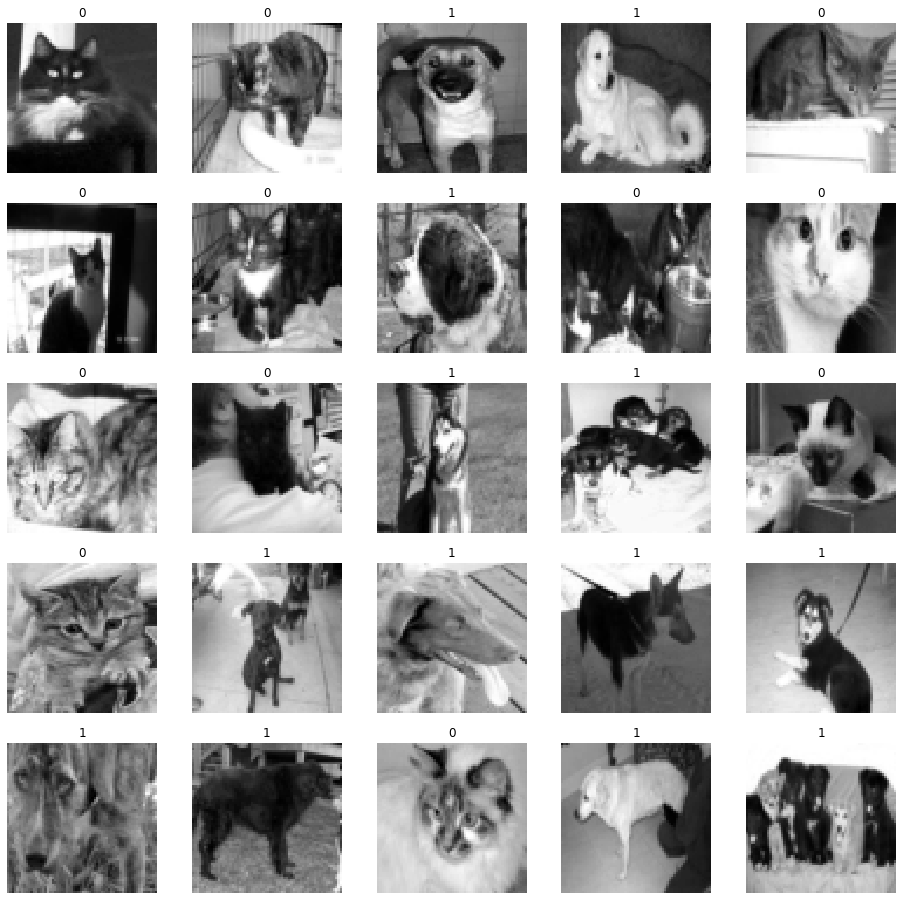

In [4]:
fig = figure(0, (16, 16))
for i in range(25):
    fig.add_subplot(5,5,i+1)
    imshow(x[i, 0, :, :].numpy(), cmap = 'gray'); axis('off')
    title(y.numpy()[i])

## 2. Basic Model Starting Point

In [5]:
#Check if we have a GPU:
if torch.cuda.is_available(): device = torch.device('cuda')
else: device = torch.device('cpu')

In [6]:
class Net(nn.Module):
    '''Le-Net 5 implementation'''
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(3136, 120)  # 64//2-1 => 31, 31//2-1 => 14, 16*14^2=3136
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.max_pool2d(torch.tanh(self.conv1(x)), (2, 2))
        x = torch.max_pool2d(torch.tanh(self.conv2(x)), (2,2))
        x = x.view(-1, self.num_flat_features(x))
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [7]:
N = Net().to(device) #Put on the GPU if we have one

In [8]:
#Setup loss function and optimizer
import torch.optim as optim
optimizer = torch.optim.SGD(N.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [9]:
print_freq = 100
num_epochs = 5

for epoch in range(num_epochs):
    for i, (x, y) in enumerate(train_loader):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad() # zero the parameter gradients
        yhat = N(x) #Forward pass
        loss = criterion(yhat, y) #Compute loss
        loss.backward() #Backpropogation in one line!
        optimizer.step() #Take step "down hill"

        if i%print_freq == 0:
            yhat = N(x)
            _, predictions = torch.max(yhat, dim =1)
            acc = y.eq(predictions).sum(dtype = torch.float)/len(predictions)
            print('epoch=', str(epoch), ', loss=', loss.data.detach().cpu().numpy(), 'accuracy=', acc.cpu().detach().numpy())

epoch= 0 , loss= 2.308065 accuracy= 0.5
epoch= 0 , loss= 0.73126346 accuracy= 0.546875
epoch= 0 , loss= 0.7125739 accuracy= 0.5


KeyboardInterrupt: 